In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chat-history/_chat.txt


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
import os

print(os.listdir('/kaggle/input/chat-history/'))


['_chat.txt']


In [11]:
import pandas as pd

# Read the text file
with open('/kaggle/input/chat-history/_chat.txt', 'r') as file:
    lines = file.readlines()

# Split each line into sender and message
data = []
for line in lines:
    parts = line.split(':')
    if len(parts) >= 2:
        sender = parts[0].strip()
        message = ':'.join(parts[1:]).strip()
        data.append((sender, message))

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['Sender', 'Message'])

# Save the DataFrame as a CSV file
df.to_csv('/kaggle/working/chat-history.csv', index=False)


In [14]:
import os

# Define the path to the chat text file
chat_file_path = '/kaggle/input/chat-history/_chat.txt'  # Replace with your file path

# Read the chat text file
with open(chat_file_path, 'r', encoding='utf-8') as file:
    chat_text = file.read()


In [16]:
import pandas as pd

# Split the chat text into lines
lines = chat_text.split('\n')

# Split each line into sender and message
data = []
for line in lines:
    if line:
        parts = line.split(':')
        if len(parts) >= 2:
            sender = parts[0].strip()
            message = ':'.join(parts[1:]).strip()
            data.append((sender, message))

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['Sender', 'Message'])

# Perform additional preprocessing steps as needed
# Examples: removing duplicates, handling missing values, text preprocessing


In [18]:
from textblob import TextBlob

# Perform sentiment analysis on the message column
df['Sentiment'] = df['Message'].apply(lambda x: TextBlob(x).sentiment.polarity)


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


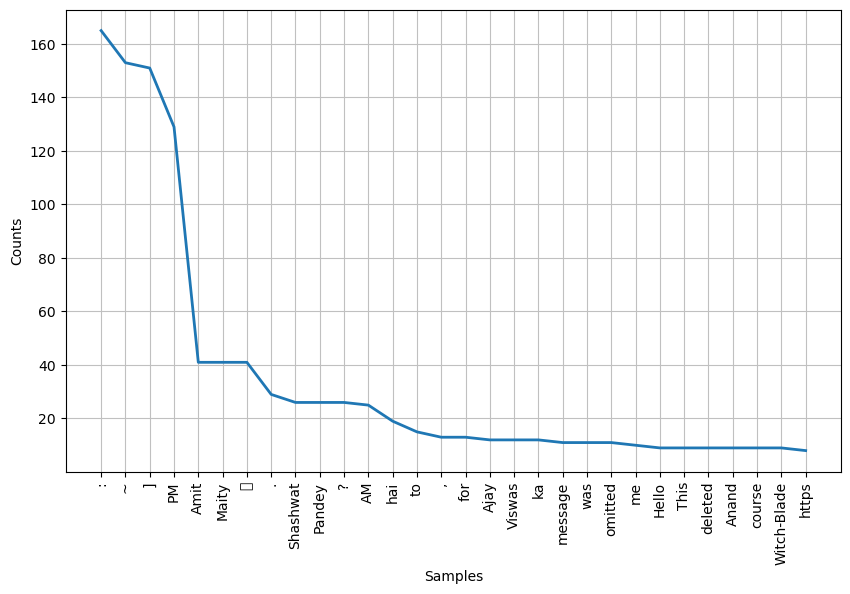

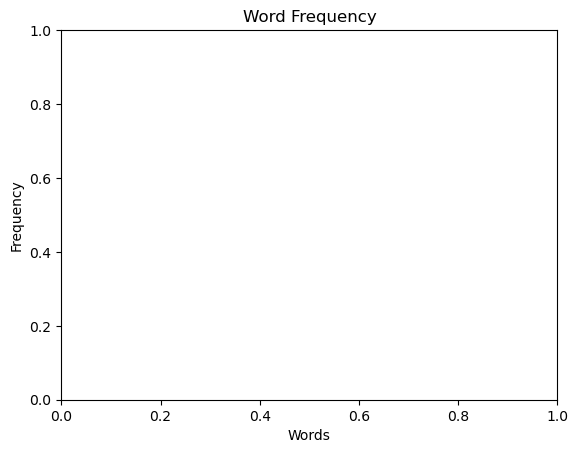

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Tokenize the messages into words
df['Tokens'] = df['Message'].apply(lambda x: word_tokenize(x))

# Calculate word frequencies
words = [word for token_list in df['Tokens'] for word in token_list]
freq_dist = FreqDist(words)

# Plot the most common words
plt.figure(figsize=(10, 6))
freq_dist.plot(30, cumulative=False)
plt.title('Word Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120279 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120316 (\N{MATHEMATICAL SANS-SERIF BOLD SMALL O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120324 (\N{MATHEMATICAL SANS-SERIF BOLD SMALL W}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120315 (\N{MATHEMATICAL SANS-SERIF BOLD SMALL N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120313 (\N{MATHEMATICAL SANS-SERIF BOLD SMALL L}) missing from curr

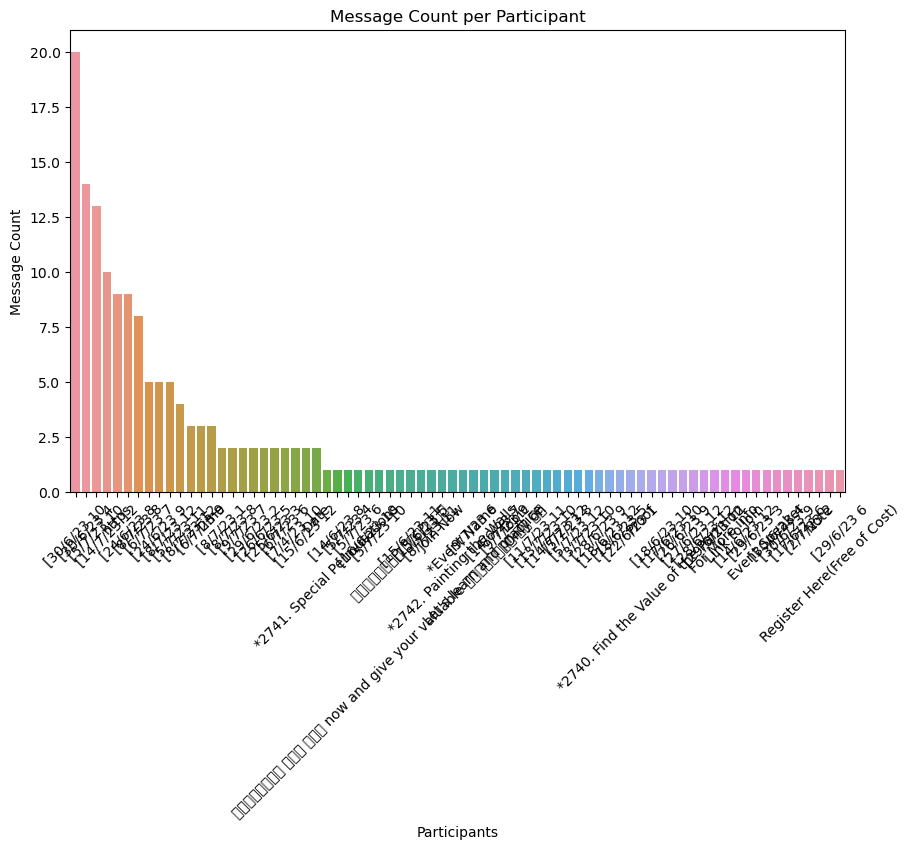

In [20]:
participant_counts = df['Sender'].value_counts()

# Plot the message count per participant
plt.figure(figsize=(10, 6))
sns.barplot(x=participant_counts.index, y=participant_counts.values)
plt.title('Message Count per Participant')
plt.xlabel('Participants')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.show()


In [23]:
print(df.columns)


Index(['Sender', 'Message', 'Sentiment', 'Tokens'], dtype='object')


In [28]:
df['Date'] = pd.to_datetime(df['Sentiment']).dt.date



In [34]:
tokens_flat = [token for sublist in df['Tokens'] for token in sublist]
unique_tokens = set(tokens_flat)

print(unique_tokens)



{'useful', 'Descending', 'Irfan', '09:23', 'kth', '🥲', '49:59', 'All', 'Any', '😍', '59:05', 'uoo', 'CP', 'Leetcode', 'phir', 'programs', 'hua', 'formally', 'wale', 'Can', '*Important*', 'Yup', 'rule', '09-07-23', '//careerjourneytips.com/art-of-cv-writing/', '\u200eMessages', 'unrated', '•', 'Abhi', 'questions', 'Distance', 'Important', 'Officially', '//shorturl.at/bF347', 'kuch', 'by', 'Bhai', 'batado', 'cv', '51:46', 'here', '🙌', 'Gandhinagar', '26555\u202c', 'any', '26:22', 'Nahi', 'likha', 'AshuDgrT', 'syntax', 'liye', '\u202a+91', 'Md', 'our', '22:59', 'usse', 'Kisi', 'codechef', 'batao', 'id=com.pracedge.kcians', 'hun', 'SAMADHIYA', 'topics', '10:21', '57:08', 'Hmm', 'jayega', '37:01', '1th', 'to', 'Unable', '46:40', '14+', 'create', '216\u202c', 'Using', 'Ok', '41:03', 'C++', 'Array', '30:48', 'transform', '02:50', 'hota', '.pdf', '\u200e20', 'Maity', 'joined', 'Placements', '04:47', 'shall', 'way', 'No', 'jisme', 'idk', 'sat', '49:22', 'using', 'ho', 'poochta', 'notes.pdf', '48

In [39]:
import pandas as pd
import emoji

# Assuming 'Message' column contains the text messages
df['Emojis'] = df['Message'].apply(lambda text: ''.join(c for c in text if c in emoji.UNICODE_EMOJI))

# Optional: Perform analysis on the extracted emojis
emoji_counts = df['Emojis'].value_counts()

# Optional: Visualize the emoji counts
emoji_counts.plot(kind='bar')

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


<Axes: >

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


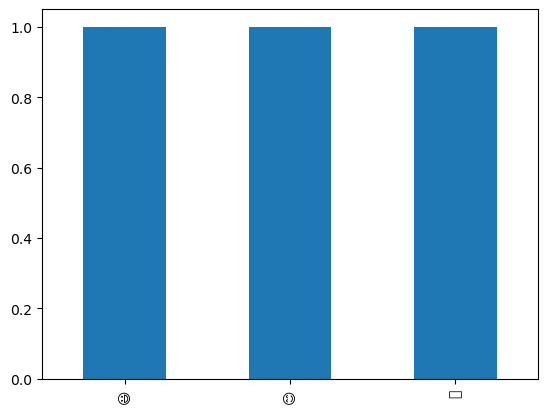

In [6]:
import pandas as pd
import emoji

# Example data
data = {
    'Sender': ['John', 'Alice', 'Bob'],
    'Message': ['Hello 😃', 'How are you? 😊', 'I love coding! 💻'],
}

# Create DataFrame
df = pd.DataFrame(data)

# Perform emoji analysis
df['Emojis'] = df['Message'].apply(lambda text: ''.join(c for c in text if emoji.is_emoji(c)))
emoji_counts = df['Emojis'].value_counts()

# Visualize emoji counts
emoji_counts.plot(kind='bar')


In [7]:
print(emoji_counts)


😃    1
😊    1
💻    1
Name: Emojis, dtype: int64


In [8]:
for emoji, count in emoji_counts.items():
    print(emoji, count)


😃 1
😊 1
💻 1


In [9]:
file_path = "/kaggle/input/chat-history/_chat.txt"

with open(file_path, "r") as file:
    content = file.read()

print(content)


[7/4/23 10:07:05 PM] DSA / CP Discussion : ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[7/4/23 10:07:05 PM] ~ Amit Maity 👀: ‎~ Amit Maity 👀 created this group
[14/6/23 12:17:57 PM] DSA / CP Discussion : ‎You joined using this group's invite link
[14/6/23 7:57:48 PM] ~ Hello: *Important*

*Event Name : Generative AI - Empowering College Students for Future Job Market*

Date : 14th of June
Time : 7.30-8.30 PM IST

Join Now : https://rb.gy/u4byx
[14/6/23 8:05:41 PM] ~ Md. Irfan: Unable to join, they denied my request.
[15/6/23 12:26:22 AM] ~ sahil: https://careerjourneytips.com/art-of-cv-writing/
[15/6/23 12:26:26 AM] ~ sahil: This article will help a lot who want to improve their cv.
[15/6/23 5:01:31 AM] ~ Shashwat Pandey: How to find full time opportunities for 2024 batch?

Abhi se FTE offer hoga paas me to confidence aayega.
[15/6/23 11:26:17 PM] ~ Hello: 📢 𝗚𝗲𝘁 𝗥𝗲𝗮𝗱𝘆 𝗳𝗼𝗿 𝘁𝗵𝗲 𝗥𝗲𝘃𝗼𝗹𝘂𝘁𝗶𝗼𝗻! 🚀 Introducing our new 

In [26]:
def extract_sender_and_message(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    senders = []
    messages = []

    for line in lines:
        line = line.strip()
        if line.startswith("["):
            # Extract sender from line
            sender_end_index = line.index("]")
            sender = line[1:sender_end_index]

            # Extract message from line
            message = line[sender_end_index + 2:]

            senders.append(sender)
            messages.append(message)

    return senders, messages

file_path = "/kaggle/input/chat-history/_chat.txt"

# Call the extract_sender_and_message() function
senders, messages = extract_sender_and_message(file_path)

# Print the sender and message information
for sender, message in zip(senders, messages):
    print(f'Sender: {sender}')
    print(f'Message: {message}')
    print('---')


Sender: 7/4/23 10:07:05 PM
Message: DSA / CP Discussion : ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
---
Sender: 7/4/23 10:07:05 PM
Message: ~ Amit Maity 👀: ‎~ Amit Maity 👀 created this group
---
Sender: 14/6/23 12:17:57 PM
Message: DSA / CP Discussion : ‎You joined using this group's invite link
---
Sender: 14/6/23 7:57:48 PM
Message: ~ Hello: *Important*
---
Sender: 14/6/23 8:05:41 PM
Message: ~ Md. Irfan: Unable to join, they denied my request.
---
Sender: 15/6/23 12:26:22 AM
Message: ~ sahil: https://careerjourneytips.com/art-of-cv-writing/
---
Sender: 15/6/23 12:26:26 AM
Message: ~ sahil: This article will help a lot who want to improve their cv.
---
Sender: 15/6/23 5:01:31 AM
Message: ~ Shashwat Pandey: How to find full time opportunities for 2024 batch?
---
Sender: 15/6/23 11:26:17 PM
Message: ~ Hello: 📢 𝗚𝗲𝘁 𝗥𝗲𝗮𝗱𝘆 𝗳𝗼𝗿 𝘁𝗵𝗲 𝗥𝗲𝘃𝗼𝗹𝘂𝘁𝗶𝗼𝗻! 🚀 Introducing our new App : 𝗣𝗿𝗮𝗰𝗘𝗱𝗴𝗲, the game-changing app that wil

In [37]:
import pandas as pd
import re
import emoji

# Read the dataset as a plain text file
with open('/kaggle/input/chat-history/_chat.txt', 'r') as file:
    lines = file.readlines()

# Create a DataFrame from the lines
df = pd.DataFrame({'RawData': lines})

# Define the emoji pattern
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

# Extract messages containing emojis
emoji_messages = df[df['RawData'].str.contains(emoji_pattern)]['RawData']

# Perform emoji analysis
emoji_counts = {}
for message in emoji_messages:
    emojis = re.findall(emoji_pattern, message)
    for emoji_char in emojis:
        if emoji_char in emoji_counts:
            emoji_counts[emoji_char] += 1
        else:
            emoji_counts[emoji_char] = 1

# Create a DataFrame from the emoji_counts dictionary
emoji_df = pd.DataFrame({'Emoji': list(emoji_counts.keys()), 'Count': list(emoji_counts.values())})

# Sort the DataFrame by count in descending order
emoji_df = emoji_df.sort_values('Count', ascending=False)

# Print the emoji counts
print(emoji_df)

         Emoji  Count
0            👀     41
30           😼      3
23           😅      2
29        𝑹𝒂𝒏𝒂      2
28       𝑺𝒂𝒈𝒂𝒓      2
26           😂      2
25           😎      2
20         😂😂😂      2
5          𝘁𝗵𝗲      2
8     𝗣𝗿𝗮𝗰𝗘𝗱𝗴𝗲      1
9            🌟      1
38           🔥      1
37          ☠♜      1
36           𝓐      1
35           𝔦      1
34           𝓂      1
33           卄      1
32          👑♔      1
31           😔      1
2          𝗚𝗲𝘁      1
3        𝗥𝗲𝗮𝗱𝘆      1
4          𝗳𝗼𝗿      1
27           🌝      1
6   𝗥𝗲𝘃𝗼𝗹𝘂𝘁𝗶𝗼𝗻      1
24           👍      1
7            🚀      1
22           🙂      1
21           🚫      1
1            📢      1
19           🙌      1
18          👍🏻      1
17           😍      1
16          𝘂𝘀      1
15          𝘁𝗼      1
14    𝗳𝗲𝗲𝗱𝗯𝗮𝗰𝗸      1
13         𝗮𝗽𝗽      1
12    𝗗𝗼𝘄𝗻𝗹𝗼𝗮𝗱      1
11     𝗜𝗻𝗰𝗹𝘂𝗱𝗲      1
10    𝗙𝗲𝗮𝘁𝘂𝗿𝗲𝘀      1
39           😒      1


<Axes: >

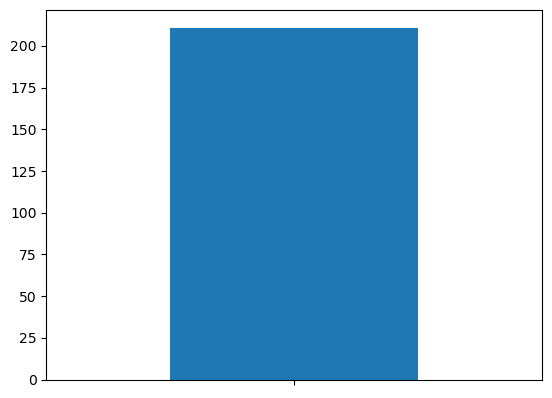

In [28]:
import pandas as pd
import emoji

# Read the data from the file
file_path = "/kaggle/input/chat-history/_chat.txt"
df = pd.read_csv(file_path, sep='\t', names=['Sender', 'Message'])

# Perform emoji analysis
df['Emojis'] = df['Message'].apply(lambda text: ''.join(c for c in text if c in emoji.UNICODE_EMOJI))
emoji_counts = df['Emojis'].value_counts()

# Visualize emoji counts
emoji_counts.plot(kind='bar')
